In [ ]:
import torch
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm
from torchvision.models import resnet50, ResNet18_Weights
from sklearn.metrics import classification_report

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])
original_dataset=ImageFolder('/content/drive/MyDrive/Colab Notebooks/ML Concordia/Major Assignment 2/archive/Data',transform=transform) # loads dataset from path

In [ ]:
num_classes = len(original_dataset.classes)
print(f"Number of classes: {num_classes}")
print(f"Number of images: {len(original_dataset)}")

Number of classes: 4
Number of images: 3096


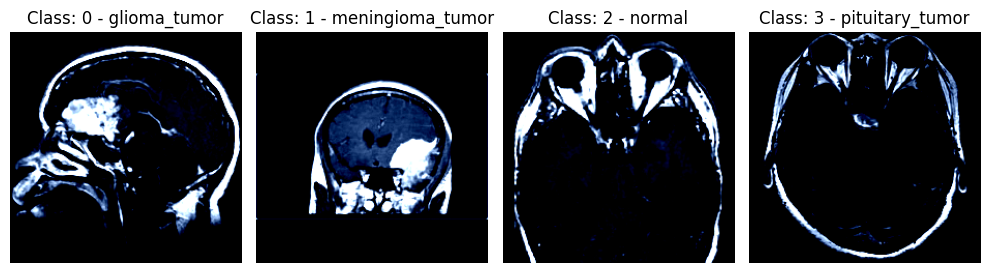

In [ ]:
plt.figure(figsize=(10, 10))
for class_label in range(len(original_dataset.classes)):
    for i, label in enumerate(original_dataset.targets):
      if label == class_label:
        image, label = original_dataset[i]
        plt.subplot(1, 4, label + 1)
        plt.imshow(image.permute(1, 2, 0))
        plt.title(f"Class: {label} - {original_dataset.classes[label]}")
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

In [ ]:
#hyperparameter
batch_size = 64
learning_rate = 0.001
num_epochs = 10

In [ ]:
train_set,test_set=torch.utils.data.random_split(original_dataset,[0.7,0.3]) # splits dataset into specified ratios
train_loader=DataLoader(train_set,shuffle=True,batch_size=batch_size) # create train loader
test_loader=DataLoader(test_set,batch_size=batch_size) # create test loader

In [ ]:
model = models.resnet18(pretrained=False)  # Initialize ResNet-18 model
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(original_dataset.classes))  # Modify the output layer for classification
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in tqdm(enumerate(train_loader)):

        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        l = loss(outputs, labels)
        l.backward()
        optimizer.step()

        running_loss += l.item()

        pass


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [ ]:
torch.save(model, '/content/drive/MyDrive/Colab Notebooks/ML Concordia/Major Assignment 2/saved models/1-model_scratch.h5')

In [ ]:
model = torch.load('/content/drive/MyDrive/Colab Notebooks/ML Concordia/Major Assignment 2/saved models/1-model_scratch.h5')

In [ ]:
# Evaluation on test set
model.eval()
correct = 0
total = 0
scratch_predicted_labels = []
scratch_true_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        scratch_predicted_labels.extend(predicted.cpu().numpy())
        scratch_true_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
print(f"Accuracy on test set: {accuracy:.2f}%")

Accuracy on test set: 89.66%


In [ ]:
print("Classification Report - Scratch-Trained Model:")
print(classification_report(scratch_true_labels, scratch_predicted_labels, target_names=original_dataset.classes))

Classification Report - Scratch-Trained Model:
                  precision    recall  f1-score   support

    glioma_tumor       0.91      0.84      0.87       263
meningioma_tumor       0.89      0.88      0.89       278
          normal       0.87      0.91      0.89       132
 pituitary_tumor       0.91      0.96      0.94       255

        accuracy                           0.90       928
       macro avg       0.89      0.90      0.90       928
    weighted avg       0.90      0.90      0.90       928



In [ ]:
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(original_dataset.classes))  # Modify the output layer for classification
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in tqdm(enumerate(train_loader)):

        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        l = loss(outputs, labels)
        l.backward()
        optimizer.step()

        running_loss += l.item()

        pass

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 126MB/s]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [ ]:
torch.save(model, '/content/drive/MyDrive/Colab Notebooks/ML Concordia/Major Assignment 2/saved models/1-model_pretrain.h5')

In [ ]:
model = torch.load('/content/drive/MyDrive/Colab Notebooks/ML Concordia/Major Assignment 2/saved models/1-model_pretrain.h5')

In [ ]:
model.eval()
correct = 0
total = 0
fine_tuned_predicted_labels = []
fine_tuned_true_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        fine_tuned_predicted_labels.extend(predicted.cpu().numpy())
        fine_tuned_true_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
print(f"Accuracy on test set: {accuracy:.2f}%")


Accuracy on test set: 85.34%


In [ ]:
# Classification report for fine-tuned model
print("Classification Report - Fine-Tuned Model:")
print(classification_report(fine_tuned_true_labels, fine_tuned_predicted_labels, target_names=original_dataset.classes))


Classification Report - Fine-Tuned Model:
                  precision    recall  f1-score   support

    glioma_tumor       0.89      0.83      0.86       263
meningioma_tumor       0.84      0.85      0.84       278
          normal       0.99      0.63      0.77       132
 pituitary_tumor       0.80      1.00      0.89       255

        accuracy                           0.85       928
       macro avg       0.88      0.83      0.84       928
    weighted avg       0.86      0.85      0.85       928

